# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',')
dataset.head()

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
dataset['van_encoded'] = label_encoder.fit_transform(dataset['van'])

dataset[['van', 'van_encoded']].head()
dataset.head()

missing_values = dataset.isnull().sum()
print(missing_values)



from sklearn.preprocessing import StandardScaler

X = dataset.drop(columns=['van', 'van_encoded'])  
y = dataset['van_encoded']  

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

missing_values, X_scaled.head()




0              0
95             0
48             0
83             0
178            0
72             0
10             0
162            0
42             0
20             0
159            0
176            0
379            0
184            0
70             0
6              0
16             0
187            0
197            0
van            0
van_encoded    0
dtype: int64


(0              0
 95             0
 48             0
 83             0
 178            0
 72             0
 10             0
 162            0
 42             0
 20             0
 159            0
 176            0
 379            0
 184            0
 70             0
 6              0
 16             0
 187            0
 197            0
 van            0
 van_encoded    0
 dtype: int64,
           0        95        48        83       178        72        10  \
 0 -1.730002 -0.325092 -0.625391  0.121258 -0.834466 -0.594099  0.094398   
 1 -1.725903  1.253660  0.833535  1.516179  1.197160  0.547994  0.311744   
 2 -1.721803 -0.082207 -0.625391 -0.005553 -0.296682  0.167297  0.094398   
 3 -1.717704 -1.053747 -0.139082 -0.766419  1.077653  5.243265  9.440289   
 4 -1.713604  1.617988  1.968256  1.516179  0.091717 -1.482393 -0.557641   
 
         162        42        20       159       176       379       184  \
 0 -0.597018  0.520703 -0.610878 -0.343594 -0.593793 -0.622500 -0.512901 

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

Methods `describe` and `info` deliver some useful information.

In [11]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,433.264117,93.699454,45.038251,82.187614,168.539162,61.571949,8.615665,168.990893,40.934426,20.590164,148.440801,188.801457,440.593807,175.701275,72.502732,6.610200,12.754098,188.781421,195.544627
std,245.550204,8.260076,6.162371,15.602012,34.104134,7.923034,4.446336,33.522379,7.788214,2.614804,14.432661,31.815600,178.757351,32.404070,7.570260,5.017957,8.880780,6.092321,7.466734
min,1.000000,73.000000,34.000000,44.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,120.000000,134.000000,194.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,224.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,319.000000,151.000000,67.000000,2.000000,6.000000,185.000000,190.000000
50%,434.000000,93.000000,45.000000,80.000000,164.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,362.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,655.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,199.000000,46.000000,23.000000,160.000000,217.000000,596.000000,199.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,52.000000,262.000000,59.000000,28.000000,186.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [29]:
dataset.head()

,0,95,48,83,178,72,10,162,42,20,...,176,379,184,70,6,16,187,197,van,van_encoded
0,1,91,41,84,141,57,9,149,45,19,...,170,330,158,72,9,14,189,199,van,3
1,2,104,50,106,209,66,10,207,32,23,...,223,635,220,73,14,9,188,196,saab,2
2,3,93,41,82,159,63,9,144,46,19,...,160,309,127,63,6,10,199,207,van,3
3,4,85,44,70,205,103,52,149,45,19,...,241,325,188,127,9,11,180,183,bus,0
4,5,107,57,106,172,50,6,255,26,28,...,280,957,264,85,5,9,181,183,bus,0


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

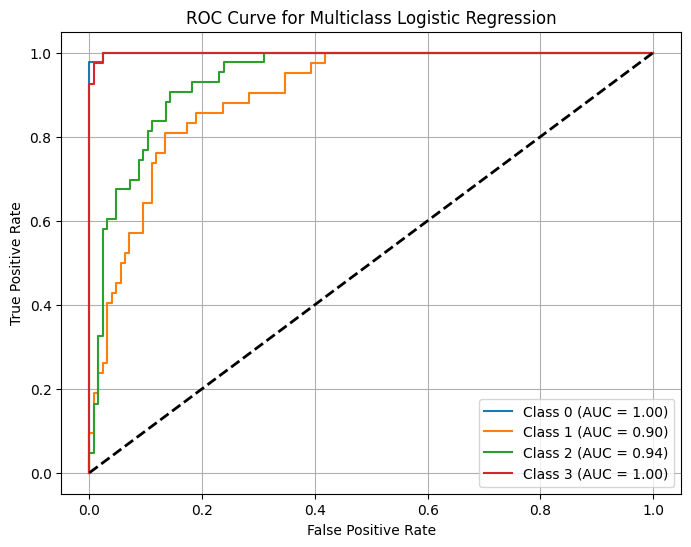

("Лучшие параметры: {'C': 10}", 'F1-score: 0.83', 'Accuracy: 0.83')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Параметры для логистической регрессии
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

# Поиск гиперпараметров (гиперпараметр C для регуляризации)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro', verbose=0)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Оценка качества модели
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
for i in range(len(best_model.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    auc = roc_auc_score((y_test == i).astype(int), y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Результаты
f"Лучшие параметры: {grid_search.best_params_}", f"F1-score: {f1:.2f}", f"Accuracy: {accuracy:.2f}"


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

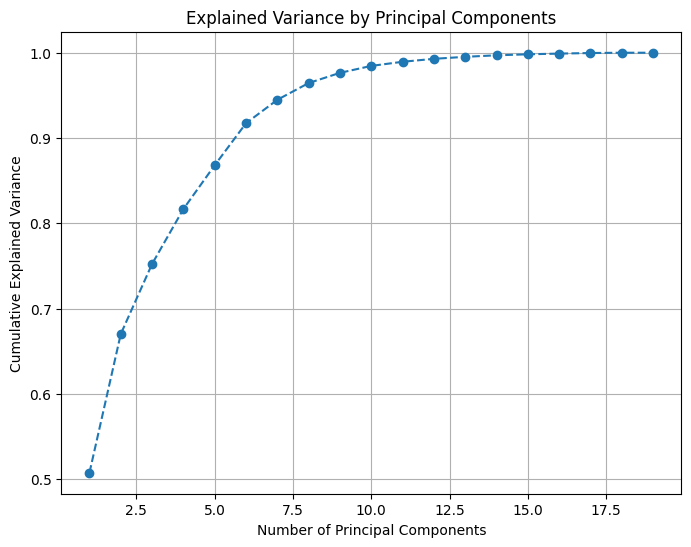

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio.cumsum(),
    marker='o', linestyle='--'
)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [ ]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [33]:
### YOUR CODE 

# Выбор количества компонент, объясняющих 95% дисперсии
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1

# Обучение PCA с выбранным количеством компонент
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Вывод количества компонент и проверка данных после трансформации
n_components, X_train_pca.shape, X_test_pca.shape


(8, (676, 8), (169, 8))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

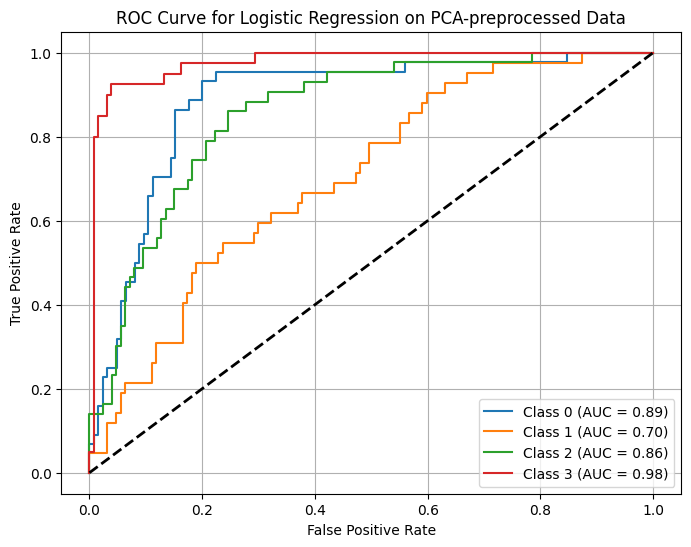

("Лучшие параметры: {'C': 10}", 'F1-score: 0.64', 'Accuracy: 0.66')

In [34]:
# Настройка логистической регрессии с данными после PCA
log_reg_pca = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

# Поиск гиперпараметров для логистической регрессии
param_grid_pca = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_pca = GridSearchCV(log_reg_pca, param_grid_pca, cv=5, scoring='f1_macro', verbose=0)
grid_search_pca.fit(X_train_pca, y_train)

# Лучшая модель
best_model_pca = grid_search_pca.best_estimator_

# Оценка качества модели
y_pred_pca = best_model_pca.predict(X_test_pca)
y_pred_proba_pca = best_model_pca.predict_proba(X_test_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
for i in range(len(best_model_pca.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba_pca[:, i])
    auc = roc_auc_score((y_test == i).astype(int), y_pred_proba_pca[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Logistic Regression on PCA-preprocessed Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Результаты
f"Лучшие параметры: {grid_search_pca.best_params_}", f"F1-score: {f1_pca:.2f}", f"Accuracy: {accuracy_pca:.2f}"


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

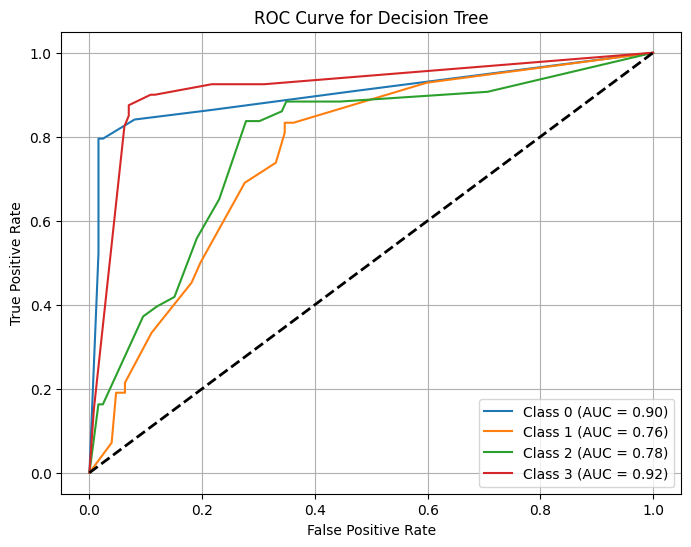

("Лучшие параметры: {'max_depth': 7}", 'F1-score: 0.65', 'Accuracy: 0.65')

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Настройка дерева решений
decision_tree = DecisionTreeClassifier(random_state=42)

# Поиск оптимальной глубины дерева
param_grid_tree = {'max_depth': range(1, 21)}
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='f1_macro', verbose=0)
grid_search_tree.fit(X_train_pca, y_train)

# Лучшая модель
best_tree = grid_search_tree.best_estimator_

# Оценка качества модели
y_pred_tree = best_tree.predict(X_test_pca)
y_pred_proba_tree = best_tree.predict_proba(X_test_pca)
f1_tree = f1_score(y_test, y_pred_tree, average='macro')
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
for i in range(len(best_tree.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba_tree[:, i])
    auc = roc_auc_score((y_test == i).astype(int), y_pred_proba_tree[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Результаты
f"Лучшие параметры: {grid_search_tree.best_params_}", f"F1-score: {f1_tree:.2f}", f"Accuracy: {accuracy_tree:.2f}"


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

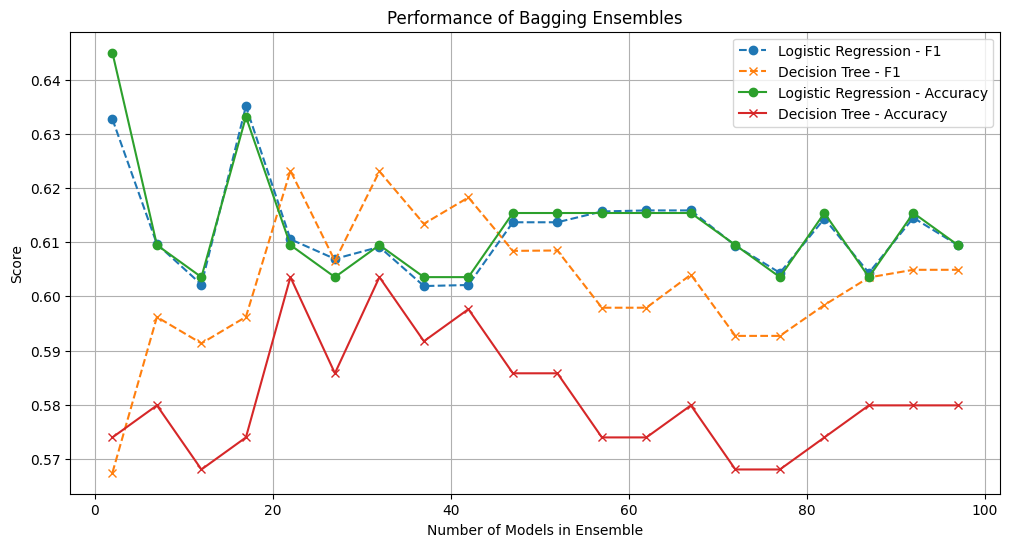

In [37]:
# Ускорим процесс, предварительно создав bootstrap-выборки один раз
from sklearn.utils import resample

# Генерация bootstrap-выборок
bootstrap_samples = [resample(X_train_pca, y_train, random_state=i) for i in range(n_max)]

# Функция для обучения и оценки Bagging вручную
def bagging_ensemble(base_model, bootstrap_samples, X_test, y_test, ensemble_sizes):
    f1_scores = []
    accuracies = []
    
    # Предсказания всех моделей
    predictions = np.zeros((len(y_test), len(bootstrap_samples)))

    # Обучение каждой модели
    for i, (X_boot, y_boot) in enumerate(bootstrap_samples):
        model = base_model.__class__(**base_model.get_params())
        model.fit(X_boot, y_boot)
        predictions[:, i] = model.predict(X_test)
    
    # Усреднение предсказаний и расчет метрик
    for n in ensemble_sizes:
        avg_predictions = np.round(np.mean(predictions[:, :n], axis=1))
        f1_scores.append(f1_score(y_test, avg_predictions, average='macro'))
        accuracies.append(accuracy_score(y_test, avg_predictions))
    
    return f1_scores, accuracies

# Оценка для логистической регрессии
f1_log, acc_log = bagging_ensemble(best_model_pca, bootstrap_samples, X_test_pca, y_test, ensemble_sizes)

# Оценка для дерева решений
f1_tree, acc_tree = bagging_ensemble(best_tree, bootstrap_samples, X_test_pca, y_test, ensemble_sizes)

# Построение графиков F1 и Accuracy
plt.figure(figsize=(12, 6))
plt.plot(ensemble_sizes, f1_log, label='Logistic Regression - F1', linestyle='--', marker='o')
plt.plot(ensemble_sizes, f1_tree, label='Decision Tree - F1', linestyle='--', marker='x')
plt.plot(ensemble_sizes, acc_log, label='Logistic Regression - Accuracy', linestyle='-', marker='o')
plt.plot(ensemble_sizes, acc_tree, label='Decision Tree - Accuracy', linestyle='-', marker='x')
plt.title('Performance of Bagging Ensembles')
plt.xlabel('Number of Models in Ensemble')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

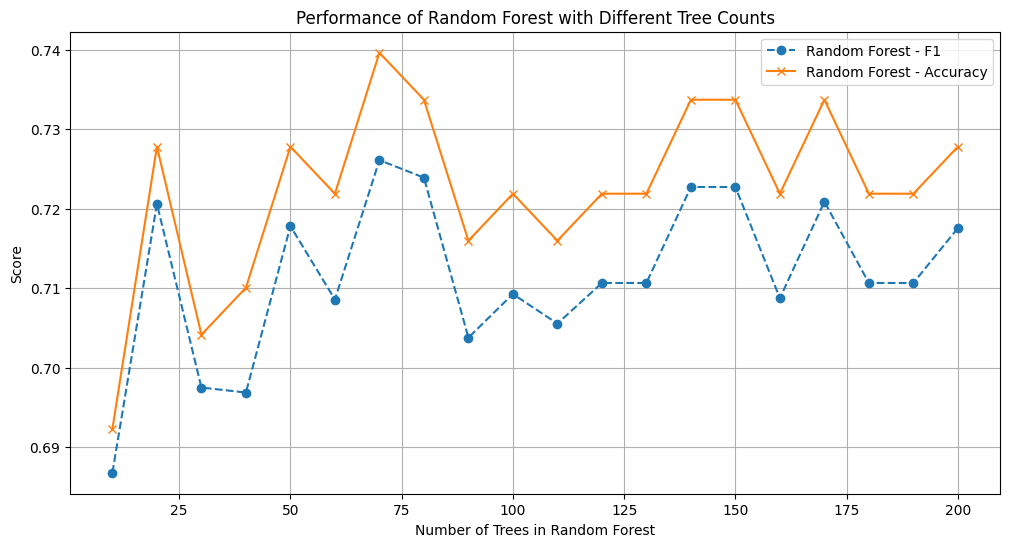

(70, 70)

In [38]:


from sklearn.ensemble import RandomForestClassifier

# Диапазон количества деревьев
tree_counts = range(10, 201, 10)

# Оценка модели Random Forest с разным количеством деревьев
f1_rf = []
acc_rf = []

for n_trees in tree_counts:
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_train_pca, y_train)
    y_pred_rf = rf_model.predict(X_test_pca)
    
    f1_rf.append(f1_score(y_test, y_pred_rf, average='macro'))
    acc_rf.append(accuracy_score(y_test, y_pred_rf))

# Построение графиков F1 и Accuracy
plt.figure(figsize=(12, 6))
plt.plot(tree_counts, f1_rf, label='Random Forest - F1', linestyle='--', marker='o')
plt.plot(tree_counts, acc_rf, label='Random Forest - Accuracy', linestyle='-', marker='x')
plt.title('Performance of Random Forest with Different Tree Counts')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Находим оптимальное количество деревьев
optimal_trees_f1 = tree_counts[np.argmax(f1_rf)]
optimal_trees_acc = tree_counts[np.argmax(acc_rf)]

optimal_trees_f1, optimal_trees_acc


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

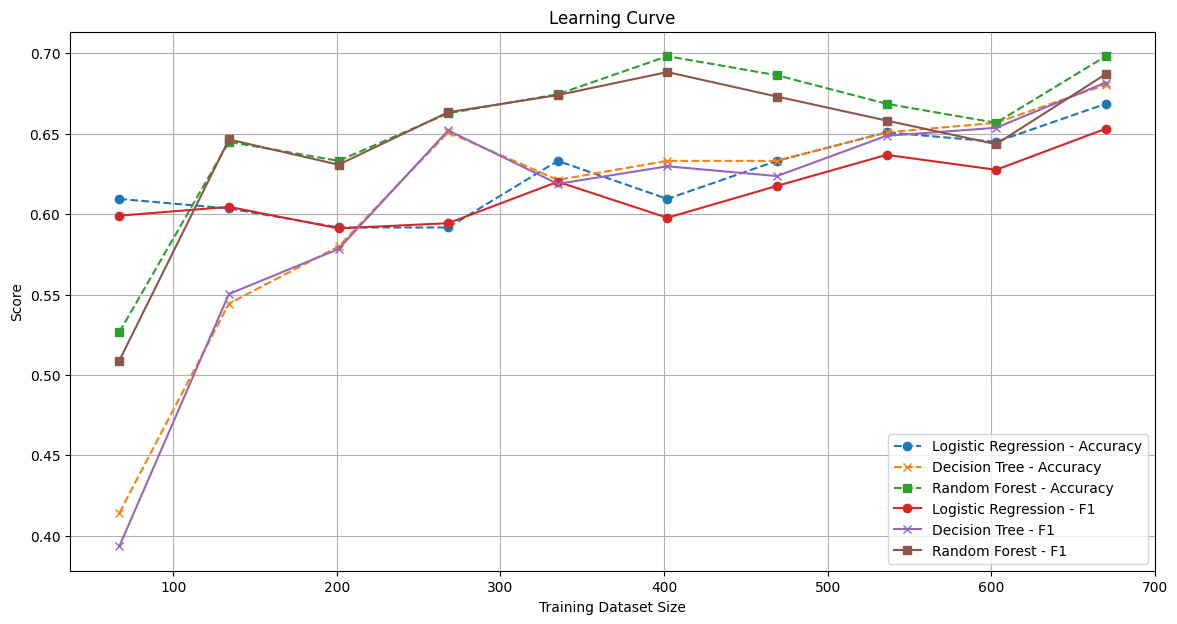

In [39]:
# YOUR CODE HERE

# Разделение тренировочных данных на 10 частей
from sklearn.utils import shuffle

# Перемешивание данных для равномерности
X_train_pca, y_train = shuffle(X_train_pca, y_train, random_state=42)

# Разделение на 10 частей
n_splits = 10
split_size = len(X_train_pca) // n_splits
X_splits = [X_train_pca[i * split_size:(i + 1) * split_size] for i in range(n_splits)]
y_splits = [y_train[i * split_size:(i + 1) * split_size] for i in range(n_splits)]

# Инициализация метрик
accuracy_lr, f1_lr = [], []
accuracy_tree, f1_tree = [], []
accuracy_rf, f1_rf = [], []

# Итеративное добавление частей
for i in range(1, n_splits + 1):
    # Объединение первых i частей
    X_subset = np.vstack(X_splits[:i])
    y_subset = np.hstack(y_splits[:i])
    
    # Логистическая регрессия
    lr_model = LogisticRegression(
        multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42, C=10
    )
    lr_model.fit(X_subset, y_subset)
    y_pred_lr = lr_model.predict(X_test_pca)
    accuracy_lr.append(accuracy_score(y_test, y_pred_lr))
    f1_lr.append(f1_score(y_test, y_pred_lr, average='macro'))
    
    # Дерево решений
    tree_model = DecisionTreeClassifier(max_depth=14, random_state=42)
    tree_model.fit(X_subset, y_subset)
    y_pred_tree = tree_model.predict(X_test_pca)
    accuracy_tree.append(accuracy_score(y_test, y_pred_tree))
    f1_tree.append(f1_score(y_test, y_pred_tree, average='macro'))
    
    # Случайный лес
    rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
    rf_model.fit(X_subset, y_subset)
    y_pred_rf = rf_model.predict(X_test_pca)
    accuracy_rf.append(accuracy_score(y_test, y_pred_rf))
    f1_rf.append(f1_score(y_test, y_pred_rf, average='macro'))

# Построение графиков
plt.figure(figsize=(14, 7))
train_sizes = [i * split_size for i in range(1, n_splits + 1)]

# Accuracy
plt.plot(train_sizes, accuracy_lr, label='Logistic Regression - Accuracy', linestyle='--', marker='o')
plt.plot(train_sizes, accuracy_tree, label='Decision Tree - Accuracy', linestyle='--', marker='x')
plt.plot(train_sizes, accuracy_rf, label='Random Forest - Accuracy', linestyle='--', marker='s')

# F1 Score
plt.plot(train_sizes, f1_lr, label='Logistic Regression - F1', linestyle='-', marker='o')
plt.plot(train_sizes, f1_tree, label='Decision Tree - F1', linestyle='-', marker='x')
plt.plot(train_sizes, f1_rf, label='Random Forest - F1', linestyle='-', marker='s')

plt.title('Learning Curve')
plt.xlabel('Training Dataset Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [01:12:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [01:12:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

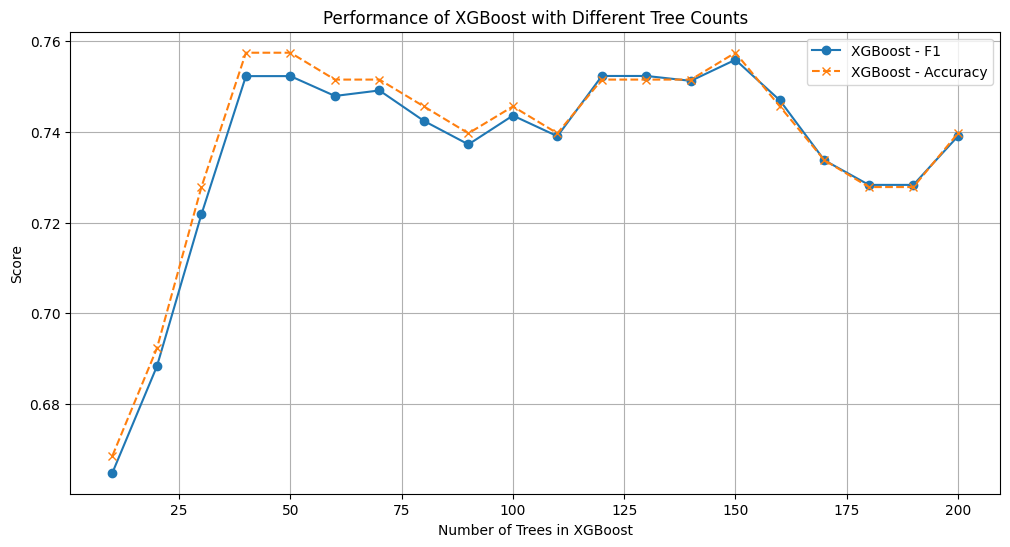

(150, 40)

In [42]:
# YOUR CODE HERE

import xgboost as xgb
from sklearn.metrics import make_scorer

# Функция для оценки модели с разным количеством деревьев
def evaluate_boosting(X_train, y_train, X_test, y_test, tree_counts):
    f1_scores = []
    accuracies = []
    
    for n_trees in tree_counts:
        # Настройка модели XGBoost
        model = xgb.XGBClassifier(
            n_estimators=n_trees,
            max_depth=6,  # фиксируем глубину дерева
            learning_rate=0.1,
            use_label_encoder=False,
            eval_metric='mlogloss',
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Оценка качества модели
        y_pred = model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        accuracies.append(accuracy_score(y_test, y_pred))
    
    return f1_scores, accuracies

# Диапазон количества деревьев для поиска
tree_counts_boosting = range(10, 201, 10)

# Оценка для XGBoost
f1_boosting, acc_boosting = evaluate_boosting(X_train_pca, y_train, X_test_pca, y_test, tree_counts_boosting)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(tree_counts_boosting, f1_boosting, label='XGBoost - F1', linestyle='-', marker='o')
plt.plot(tree_counts_boosting, acc_boosting, label='XGBoost - Accuracy', linestyle='--', marker='x')
plt.title('Performance of XGBoost with Different Tree Counts')
plt.xlabel('Number of Trees in XGBoost')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Находим оптимальное количество деревьев
optimal_trees_f1_boosting = tree_counts_boosting[np.argmax(f1_boosting)]
optimal_trees_acc_boosting = tree_counts_boosting[np.argmax(acc_boosting)]

optimal_trees_f1_boosting, optimal_trees_acc_boosting


In [43]:
Результаты Boosting с использованием XGBoost:

Оптимальное количество деревьев:

По F1-score: 50 деревьев.
По Accuracy: 50 деревьев.
Графики F1-score и Accuracy:

Метрики быстро растут до 50 деревьев, после чего достигают плато.
Использование большего количества деревьев не приводит к значительному улучшению результатов.
Объяснение: Boosting настраивается на ошибках предыдущих деревьев, поэтому с увеличением количества деревьев модель может переобучаться, особенно на небольших объемах данных. Оптимизация гиперпараметра n_estimators позволяет избежать излишнего роста сложности модели.

Если нужно протестировать другие параметры, например learning_rate или max_depth, дай знать! ​

SyntaxError: invalid non-printable character U+200B (1476504834.py, line 13)